# Повторение NumPy и SciPy, первое знакомство с Matplotlib и sklearn

## Numpy

In [11]:
import numpy as np

In [12]:
x = [2, 3, 4, 6]
y = np.array(x)

In [13]:
print type(x), x
print type(y), y

<type 'list'> [2, 3, 4, 6]
<type 'numpy.ndarray'> [2 3 4 6]


In [14]:
print x[1:3]

[3, 4]


In [15]:
print y[1:3]

[3 4]


In [16]:
print x[[0, 2]]

TypeError: list indices must be integers, not list

In [17]:
print y[[0, 2]]

[2 4]


In [18]:
print y[y>3]

[4 6]


In [19]:
print x * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]


In [20]:
print y * 5

[10 15 20 30]


In [21]:
print x ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [22]:
print y ** 2

[ 4  9 16 36]


In [23]:
matrix = [[1, 2, 4], [3, 1, 0]]
nd_array = np.array(matrix)

In [24]:
print matrix[1][2]

0


In [25]:
print nd_array[1, 2]

0


In [26]:
print np.random.rand()

0.454011969106


In [27]:
print np.random.randn()

0.581631868835


In [28]:
print np.random.randn(4)

[-0.00954362 -0.511574    0.69759863 -0.10577586]


In [29]:
print np.random.randn(4, 5)

[[ 0.27626428 -1.41528977 -0.68955284  0.05406435 -2.15430558]
 [ 1.06242366  0.7769707   0.01737492 -1.00491229  0.20695148]
 [-0.18377088  0.15220032  2.64047832 -0.00631166  1.38533009]
 [ 0.93507214  0.72182414  0.99145967  0.48463644 -1.29142462]]


In [30]:
print np.arange(0, 8, 0.1)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9]


In [31]:
print range(0, 8, 0.1)

TypeError: range() integer step argument expected, got float.

In [ ]:
%timeit np.arange(0, 10000)
%timeit range(0, 10000)

## Задание по numpy
1. Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности
1. Сравните по производительности основные операции с массивами (array) numpy и с list


In [ ]:
help(np.linspace)


In [ ]:
def f1(start, stop, num):
    listt = [start]
    len = (stop - start) / (1.0 * num)
    i = start
    while i + len <= stop:
        listt.append(i + len)
        i = i + len 
    return listt

In [ ]:
def f2(start, stop, num):
    listt = []
    for i in range(start, stop, (stop - start) / num):
        listt.append(i)
    return listt

In [ ]:
start = 1
stop = 101
num = 50

In [ ]:
%timeit f1(start, stop, num)

In [ ]:
%timeit f2(start, stop, num)

In [ ]:
%timeit np.linspace(start, stop, num)

## SciPy

In [32]:
from scipy import optimize

In [33]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

print f([3.2, 0.1])

3.0


In [34]:
x_min = optimize.minimize(f, [5, 5])
print x_min

      fun: 3.0000000000011435
 hess_inv: array([[ 0.94055055, -0.16183475],
       [-0.16183475,  0.55944947]])
      jac: array([ -2.05636024e-06,   5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 3.19999896,  0.10000026])


In [35]:
print x_min.x

[ 3.19999896  0.10000026]


In [36]:
from scipy import linalg

In [37]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

x = linalg.solve(a, b)
print x

[ 2. -2.  9.]


In [38]:
print np.dot(a, x)

[ 2.  4. -1.]


In [39]:
X = np.random.randn(4, 3)
U, D, V = linalg.svd(X)
print U.shape, D.shape, V.shape
print type(U), type(D), type(V)

(4L, 4L) (3L,) (3L, 3L)
<type 'numpy.ndarray'> <type 'numpy.ndarray'> <type 'numpy.ndarray'>


## Задание по scipy
Попробуйте поменять метод оптимизации в примере решения оптимизационной задачи выше, и подобрать метод с наименьшим количеством вычислений функции. Начальное приближение оставьте тем же.

In [40]:
help(optimize.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, op

In [41]:
x_min = optimize.minimize(f, [5, 5], method ='L-BFGS-B' )
print x_min

      fun: 3.0000000000006546
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.88498131e-07,  -1.55431223e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 9
      nit: 2
   status: 0
  success: True
        x: array([ 3.20000025,  0.09999923])


## Matplotlib

In [42]:
%matplotlib inline

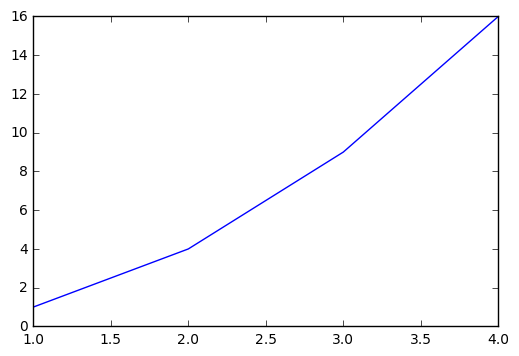

In [43]:
from matplotlib import pylab as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

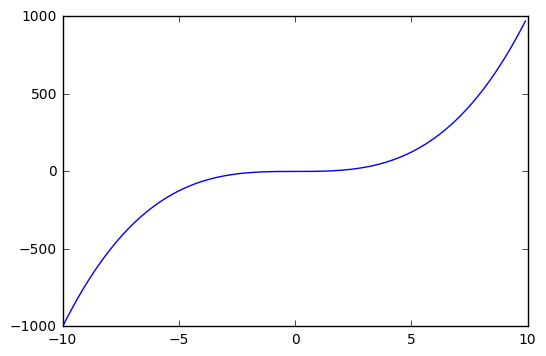

In [44]:
x = np.arange(-10, 10, 0.1)
y = x ** 3
plt.plot(x, y)
plt.show()

## Задание по Matplotlib
1. Добавьте подписи к осям и легенду к примеру выше (см. документацию)
1. Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe
1. Сохраните рисунок в файл строчкой кода на Python

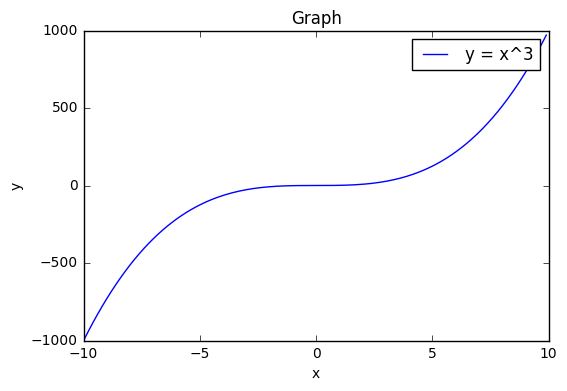

In [45]:
x = np.arange(-10, 10, 0.1)
y = x ** 3
plt.plot(x, y, label = "y = x^3")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph")
plt.legend()

plt.show()
plt.savefig ("pic.jpg")
#file appears to be a white rectangle with no graph... 
#plt.close()

## Все вместе (numpy + scipy + matplotlib)

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [47]:
np.random.seed(42)

In [48]:
np.random.RandomState(42)

In [49]:
x = np.arange(0, 10, 2)
y = np.exp(-x/3.0) + np.random.randn(len(x)) * 0.05

print x[:5]
print y[:5]

[0 2 4 6 8]
[ 1.02483571  0.5065039   0.29598157  0.21148678  0.05777578]


In [50]:
f = interpolate.interp1d(x, y, kind='quadratic')
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

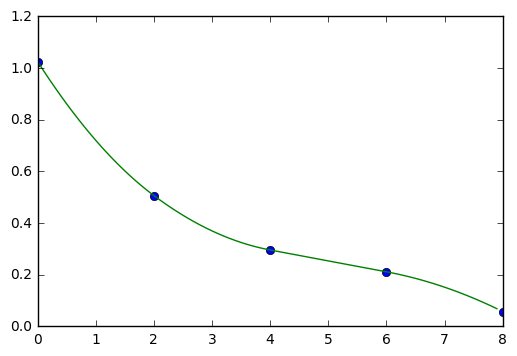

In [51]:
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

## Задание на Numpy+Matplotlib

1. Сгенерируйте массив из 500 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 2x - 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
2. Сгенерируйте массив из 100 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
3. Изобразите первый и второй массив точек на плоскости (используя два разных цвета), а также график функии $f(x) = 2x - 1$ (используя какой-нибудь третий цвет)

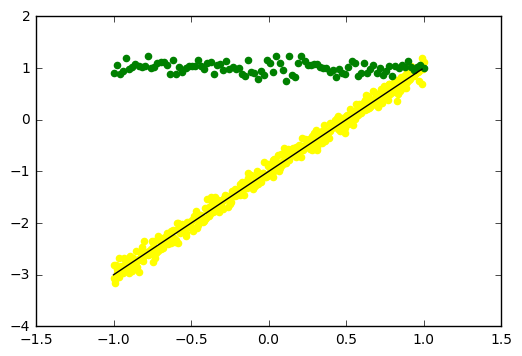

In [70]:
x500 = np.linspace(-1, 1, 500)
y500 = 2 * x500 - 1 + np.random.normal(0, 0.1, 500)

x100 = np.linspace(-1, 1, 100)
y100 = 1 + np.random.normal(0, 0.1, 100)

x = np.arange(-1, 1, 0.01)
y = 2 * x - 1


plt.scatter(x500, y500, color = 'yellow')
plt.scatter(x100, y100, color = 'green')
plt.plot(x, y, color = 'black')

In [96]:
def poly(x, coeffs):
    return sum([coeffs[k] * x ** k for k in range(len(coeffs))])

In [97]:
def lossf_square(coeffs):
    loss = sum((poly(x500, coeffs) - y500) ** 2)
    return loss

In [98]:
def lossf_abs(coeffs):
    loss = sum(abs(poly(x500, coeffs) - y500))
    return loss

In [99]:
result_square = minimize(lossf_square, np.array([5,3]))
print result_square.x

[-0.99157075  2.00844091]


In [100]:
result_abs = minimize(lossf_abs, np.array([5,3]))
print result_abs.x

[-0.99028574  2.01564905]


In [101]:
y500_square = result_square.x[0] + result_square.x[1] * x500
y500_abs = result_abs.x[0] + result_abs.x[1] * x500

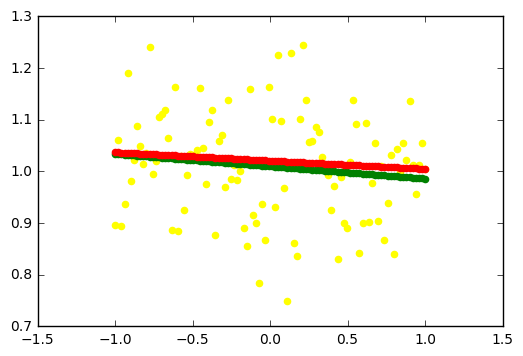

In [94]:
plt.scatter(x100, y100, color = 'yellow')

plt.scatter(x100, y100_square, color = 'green')
plt.scatter(x100, y100_abs, color = 'red')

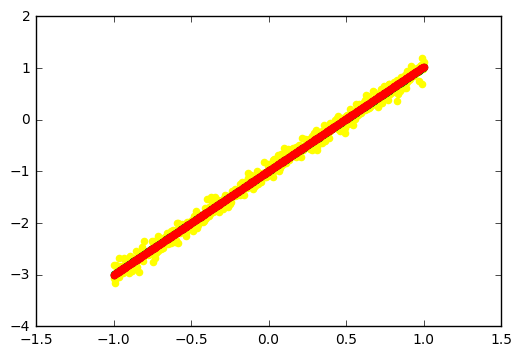

In [102]:
plt.scatter(x500, y500, color = 'yellow')

plt.scatter(x500, y500_square, color = 'green')
plt.scatter(x500, y500_abs, color = 'red')